# The Wilson-Cowan model

In this notebook, the basic use of the implementation of the Wilson-Cowan (`wc`) model is presented. 

In the `wc` model, the activity of a particular brain region is defined by a coupled system of excitatory (E) and inhibitory (I) neuronal populations with the mean firing rates of the E and I pools being the dynamic variables, as first described by Wilson and Cowan in 1972 ( H.R. Wilson and J.D. Cowan. *Excitatory and inhibitory interactions in localized populations of model neurons*. Biophys. J., 12:1–24 (1972)) 

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import scipy
import neurolib.utils.devutils as du

from neurolib.models.wc import WCModel

import neurolib.utils.loadData as ld
import neurolib.utils.functions as func
from neurolib.utils.loadData import Dataset
from scipy.io import loadmat
from neurolib.utils.loadData import filterSubcortical

# a nice color map
plt.rcParams['image.cmap'] = 'plasma'

In [10]:
data_path = "/Users/pamirozsuna/Desktop/pamir_ma/SCZ-FC-modelling"

In [11]:
def averageMat(Mat):
    avMat = np.zeros((94,94))
    for i in range(len(Mat)):
        avMat = avMat + Mat[i]
    avMat = avMat/len(Mat)
    return avMat

In [12]:
C_data = np.load(data_path+"/AvgCmatrixSCZ.npy")
D_data = np.load(data_path+"/AvgDmatrixSCZ.npy")

In [13]:
Cmat_tmp = averageMat(C_data)
Dmat_tmp = averageMat(D_data)

In [14]:
Cmat = filterSubcortical(Cmat_tmp)
Dmat = filterSubcortical(Dmat_tmp)

In [15]:
FC_data = np.load(data_path+"/AvgFmatrixSCZ.npy")
timeseries = np.load(data_path+"/AvgTmatrixSCZ.npy")

In [16]:
FC_tmp = averageMat(FC_data)
FCs = filterSubcortical(FC_tmp)

In [17]:
#wc.params['exc_ext'] = 0.45
#wc.params['c_excinh'] = 10.1
#wc.params['c_inhexc'] = 9.55
#wc.params['c_inhinh'] = 0
#wc.params['K_gl'] = 1.84
#wc.params['sigma_ou'] = 4.28e-05

#wc.params['exc_ext'] = 0.45
#wc.params['c_excinh'] = 10.1
#wc.params['c_inhexc'] = 9.95
#wc.params['c_inhinh'] = 0
#wc.params['K_gl'] = 1.84
#wc.params['sigma_ou'] = 4.28e-05
total_gbc_model = []
total_scores_model = []
i_list = []

input = np.linspace(0, 2, 50) 

for i in range(len(input)): 
    wc = WCModel(Cmat = Cmat, Dmat = Dmat)
    wc.params['duration'] = 40*1000
    print(i)
    print(input[i])
    wc.params['exc_ext'] = 0.45
    wc.params['c_excinh'] = 10.33
    wc.params['c_inhexc'] = 9.67
    wc.params['c_inhinh'] = 0
    wc.params['K_gl'] = 1.84
    wc.params['sigma_ou'] = input[i]
    wc.run(bold = True)
    gbc_model = np.mean(func.fc(wc.BOLD.BOLD[:, wc.BOLD.t_BOLD>10000]))
    total_gbc_model.append(gbc_model)
    print(gbc_model)
    scores = [func.matrix_correlation(func.fc(wc.BOLD.BOLD[:, wc.BOLD.t_BOLD>10000]), FCs)]
    total_scores_model.append(np.mean(scores))
    i_list.append(i)

0
0.0
0.45780667281051535
1
0.04081632653061224
0.01604277917901904
2
0.08163265306122448
0.029298192281174675
3
0.12244897959183673
0.023960040273114557
4
0.16326530612244897
0.021383790989089456
5
0.2040816326530612
0.015964508302843638
6
0.24489795918367346
0.01960974527425139
7
0.2857142857142857
0.005250873287698335
8
0.32653061224489793
0.006352841375561027
9
0.36734693877551017
0.007576720070422535
10
0.4081632653061224
0.011083893408079764
11
0.44897959183673464
0.01114959212922461
12
0.4897959183673469
0.029139787765295848
13
0.5306122448979591
0.01061862656586577
14
0.5714285714285714
0.017157915926730816
15
0.6122448979591836
0.021703931355835503
16
0.6530612244897959
0.01001119666701838
17
0.6938775510204082
0.013647883511671904
18
0.7346938775510203
0.019326503584295326
19
0.7755102040816326
0.00958553080621367
20
0.8163265306122448
0.025631910640004273
21
0.8571428571428571
0.01578297618910047
22
0.8979591836734693
0.013119434316543978
23
0.9387755102040816
0.013322293568

In [18]:
print(total_gbc_model)
print(total_scores_model)

[0.45780667281051535, 0.01604277917901904, 0.029298192281174675, 0.023960040273114557, 0.021383790989089456, 0.015964508302843638, 0.01960974527425139, 0.005250873287698335, 0.006352841375561027, 0.007576720070422535, 0.011083893408079764, 0.01114959212922461, 0.029139787765295848, 0.01061862656586577, 0.017157915926730816, 0.021703931355835503, 0.01001119666701838, 0.013647883511671904, 0.019326503584295326, 0.00958553080621367, 0.025631910640004273, 0.01578297618910047, 0.013119434316543978, 0.013322293568513818, 0.0054137455445688746, 0.012607147277782244, 0.0037015822083383354, 0.02111341214397257, 0.020883695905747953, 0.01996468099564051, 0.01693646422457318, 0.010204328796322621, 0.0114669035522627, 0.008090527532916357, 0.004531106629057132, 0.012116919181344445, 0.01998356192744372, 0.011948836982544056, 0.006079868581354684, 0.006082251594994292, 0.014301203243320473, 0.014927484240775803, 0.008125185627662639, 0.009330179664911476, 0.01984125228579211, 0.007424823334129282, 

In [19]:
print(input)

[0.         0.04081633 0.08163265 0.12244898 0.16326531 0.20408163
 0.24489796 0.28571429 0.32653061 0.36734694 0.40816327 0.44897959
 0.48979592 0.53061224 0.57142857 0.6122449  0.65306122 0.69387755
 0.73469388 0.7755102  0.81632653 0.85714286 0.89795918 0.93877551
 0.97959184 1.02040816 1.06122449 1.10204082 1.14285714 1.18367347
 1.2244898  1.26530612 1.30612245 1.34693878 1.3877551  1.42857143
 1.46938776 1.51020408 1.55102041 1.59183673 1.63265306 1.67346939
 1.71428571 1.75510204 1.79591837 1.83673469 1.87755102 1.91836735
 1.95918367 2.        ]


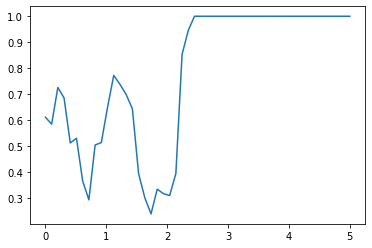

In [12]:
plt.plot(input, total_gbc_model)
plt.show()